<a href="https://colab.research.google.com/github/rorybain96/pythonfinancial/blob/master/StockCorrelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import numpy as np
 import pandas as pd
 #used to grab the stock prices, with yahoo
 import pandas_datareader as web
 from datetime import datetime
 #to visualize the results
 import matplotlib.pyplot as plt
 import seaborn


In [21]:
 #select start date for correlation window as well as list of tickers
 start = datetime(2020, 1, 1)
 symbols_list = ['AAPL', 'F', 'TWTR', 'FB', 'AAL', 'AMZN', 'GOOGL', 'GE', 'LVGO', 'TDOC']

In [23]:
#pulling stock prices and putting into a data frame
#array to store prices
symbols=[]

# pull price using iex for each symbol in list defined above
for ticker in symbols_list: 
    r = web.DataReader(ticker, 'yahoo', start)
    # add a symbol column
    r['Symbol'] = ticker 
    symbols.append(r)
    
# concatenate into df
df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]
df.head()

,Date,Close,Symbol
0,2020-01-02,300.350006,AAPL
1,2020-01-03,297.429993,AAPL
2,2020-01-06,299.799988,AAPL
3,2020-01-07,298.390015,AAPL
4,2020-01-08,303.190002,AAPL


In [24]:
# we need to pivot the dataframe so our tickers are column headers
df_pivot = df.pivot('Date','Symbol','Close').reset_index()
df_pivot.head()


Symbol,Date,AAL,AAPL,AMZN,F,FB,GE,GOOGL,LVGO,TDOC,TWTR
0,2020-01-02,29.090000,300.350006,1898.010010,9.42,209.779999,11.93,1368.680054,25.219999,83.260002,32.299999
1,2020-01-03,27.650000,297.429993,1874.969971,9.21,208.669998,11.97,1361.520020,25.160000,82.959999,31.520000
2,2020-01-06,27.320000,299.799988,1902.880005,9.16,212.600006,12.14,1397.810059,25.040001,86.940002,31.639999
3,2020-01-07,27.219999,298.390015,1906.859985,9.25,213.059998,12.05,1395.109985,25.650000,85.730003,32.540001
4,2020-01-08,27.840000,303.190002,1891.969971,9.25,215.220001,11.94,1405.040039,26.080000,86.220001,33.049999


In [25]:
# now we run the correlation, using pandas corr function to compute pearsons correlation coefficient
corr_df = df_pivot.corr(method='pearson')
# reset symbol as index (rather than 0-X)
corr_df.head().reset_index()
corr_df.head(10)


Symbol,AAL,AAPL,AMZN,F,FB,GE,GOOGL,LVGO,TDOC,TWTR
Symbol,,,,,,,,,,
AAL,1.000000,-0.090234,-0.492904,0.875946,0.040750,0.964972,0.306605,-0.468239,-0.792094,0.390888
AAPL,-0.090234,1.000000,0.864708,0.298853,0.916702,-0.192331,0.801720,0.896139,0.565247,0.740432
AMZN,-0.492904,0.864708,1.000000,-0.136273,0.765990,-0.572871,0.593459,0.957929,0.874029,0.473871
F,0.875946,0.298853,-0.136273,1.000000,0.420125,0.824000,0.616935,-0.065541,-0.531776,0.663383
FB,0.040750,0.916702,0.765990,0.420125,1.000000,-0.064509,0.910565,0.763047,0.437657,0.781733
GE,0.964972,-0.192331,-0.572871,0.824000,-0.064509,1.000000,0.239391,-0.547068,-0.830107,0.346937
GOOGL,0.306605,0.801720,0.593459,0.616935,0.910565,0.239391,1.000000,0.571810,0.218193,0.887101
LVGO,-0.468239,0.896139,0.957929,-0.065541,0.763047,-0.547068,0.571810,1.000000,0.829339,0.501419
TDOC,-0.792094,0.565247,0.874029,-0.531776,0.437657,-0.830107,0.218193,0.829339,1.000000,0.107095


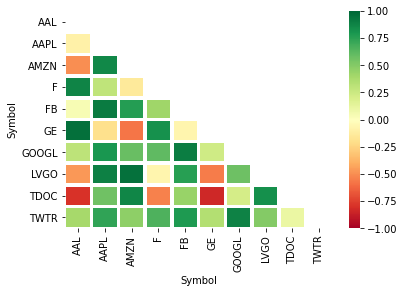

In [29]:
#take the bottom triangle since it repeats itself
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
 #generate plot
seaborn.heatmap(corr_df, cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()
